In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# import warnings
# warnings.filterwarnings('ignore')


# Overview the Data Set

(-0.5, 63.5, 63.5, -0.5)

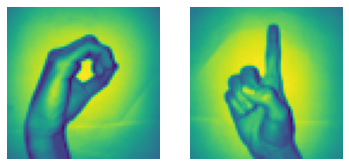

In [3]:
# data load
x_1 = np.load('X.npy')
y_1 = np.load('Y.npy')
img_size = 64

plt.subplot(1,2,1)
plt.imshow(x_1[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_1[900].reshape(img_size, img_size))
plt.axis('off')

In [4]:
X = np.concatenate((x_1[204:409], x_1[822:1027]), axis=0)

Z = np.zeros(205)
O = np.ones(205)

Y = np.concatenate((Z,O), axis=0).reshape(X.shape[0],1)
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (410, 64, 64)
Y shape: (410, 1)


In [5]:
# train set, test set create
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print(number_of_train, number_of_test)

348 62


In [6]:
# 차원을 변경
X_train_flattern=X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flattern=X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2])

#reshape 함수 형식 알아보기

print(X_train_flattern.shape, X_test_flattern.shape)

(348, 4096) (62, 4096)


In [7]:
# 행렬을 전치

x_train = X_train_flattern.T
x_test = X_test_flattern.T
y_train = Y_train.T
y_test = Y_test.T

print(x_train.shape)

(4096, 348)


# logistic regression
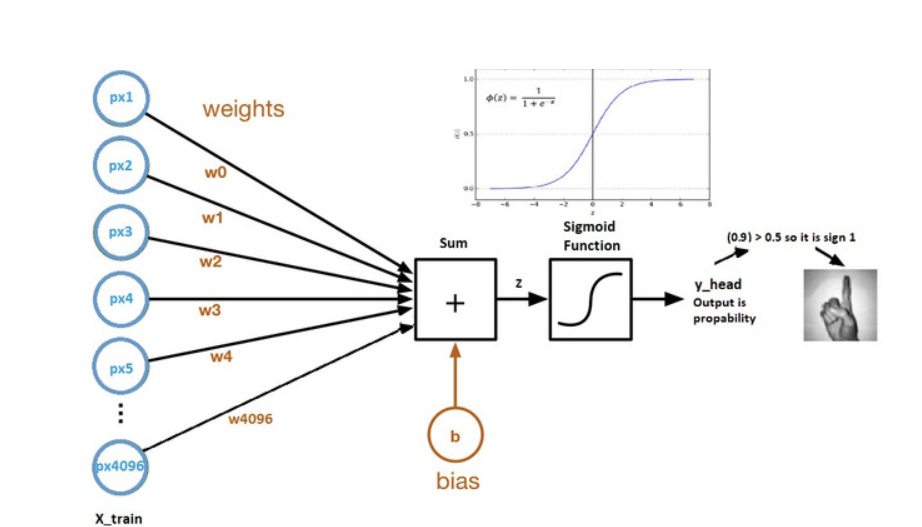

In [8]:
def dummy(param):
    dummy_param = param +5
    return dummy_param
result = dummy(3)

def initialize_weight_and_bias(dimension):
    w = np.full((dimension , 1), 0.01)
    b = 0.0
    return w,b

def sigmoid(x):
    y_head= 1/(1+np.e**(-x))
    return y_head

In [9]:
sigmoid(100)

1.0

In [10]:
def forward_propagation(w, b, x_train, y_train):
    x = np.dot(w.T, x_train) +b # dot함수는 내적  다시 알아보기
    y_head = sigmoid(x)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    return cost

In [11]:
w,b=initialize_weight_and_bias(4096)

cost = forward_propagation(w, b, x_train, y_train)
print(cost)

14.014222401929988


# gradient descent

In [12]:
def forward_backward_propagation(w,b, x_train, y_train):
    x = np.dot(w.T, x_train) +b # dot함수는 내적  다시 알아보기
    y_head = sigmoid(x)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    
    #backward propagation
    derivate_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivate_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivate_weight":derivate_weight, "derivate_bias": derivate_bias}
    return cost, gradients
    

In [13]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    # 이게 에포크코드
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivate_weight"]
        b = b - learning_rate * gradients["derivate_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

Cost after iteration 0: 14.014222
Cost after iteration 10: 1.918535
Cost after iteration 20: 1.750365
Cost after iteration 30: 1.653524
Cost after iteration 40: 1.560956
Cost after iteration 50: 1.457745
Cost after iteration 60: 1.335495
Cost after iteration 70: 1.191800
Cost after iteration 80: 1.027511
Cost after iteration 90: 0.843100
Cost after iteration 100: 0.639890
Cost after iteration 110: 0.432595
Cost after iteration 120: 0.278192
Cost after iteration 130: 0.221609
Cost after iteration 140: 0.208972
Cost after iteration 150: 0.203415
Cost after iteration 160: 0.198754
Cost after iteration 170: 0.194446
Cost after iteration 180: 0.190433
Cost after iteration 190: 0.186683


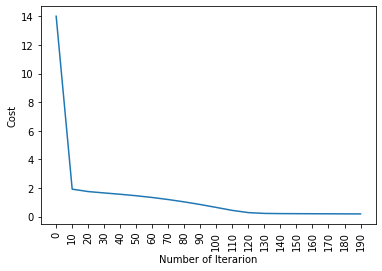

In [14]:
parameters, gradients, cost_list = update(w, b, x_train, y_train, 
                                          learning_rate = 0.009,number_of_iterarion = 200)


# 업데이트 200번.... 인데 왜 나는 달라?
# 120번 학습부터 오차의 변화가 거의 없다.
# 학습은 120번까지 하는게 효율이 좋다.

In [15]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

In [16]:
predict(parameters["weight"],parameters["bias"],x_test)

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

### logistic_regression으로 학습

In [17]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weight_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


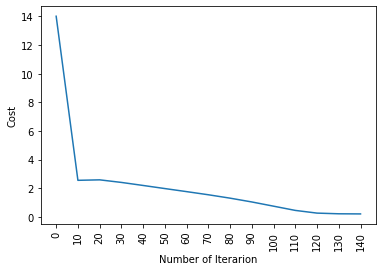

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [18]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

# 강사님 코드

In [19]:
# sklearn 이용
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state=42, max_iter=150)

print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))


# 직접 만든 logistic보다 라이브러리 안에 있는게 조흠~~~~ ㅎ


c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was ex

test accuracy: 0.967741935483871 
train accuracy: 1.0 


c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [21]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"],x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [22]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    
    #cost 구하는 공식
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [23]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):
    
    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    
    return grads

In [24]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [25]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

Cost after iteration 0: 0.383572
Cost after iteration 100: 0.358658
Cost after iteration 200: 0.349811
Cost after iteration 300: 0.346609
Cost after iteration 400: 0.345441
Cost after iteration 500: 0.345014
Cost after iteration 600: 0.344857
Cost after iteration 700: 0.344800
Cost after iteration 800: 0.344779
Cost after iteration 900: 0.344771
Cost after iteration 1000: 0.344769
Cost after iteration 1100: 0.344768
Cost after iteration 1200: 0.344767
Cost after iteration 1300: 0.344767
Cost after iteration 1400: 0.344767
Cost after iteration 1500: 0.344767
Cost after iteration 1600: 0.344767
Cost after iteration 1700: 0.344767
Cost after iteration 1800: 0.344767
Cost after iteration 1900: 0.344767
Cost after iteration 2000: 0.344767
Cost after iteration 2100: 0.344767
Cost after iteration 2200: 0.344767
Cost after iteration 2300: 0.344767
Cost after iteration 2400: 0.344767


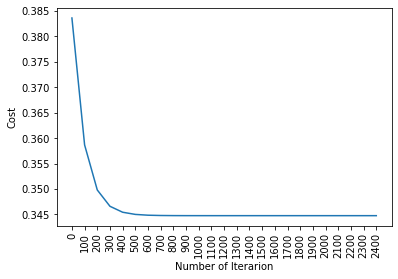

train accuracy: 50.57471264367816 %
test accuracy: 46.7741935483871 %


In [26]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    
    cost_list = []
    index_list = []
    
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    
    for i in range(0, num_iterations):
        
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters



parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

In [27]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4838
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5298
Epoch 3/100
8/8 [==============================] - 0s 997us/step - loss: 0.6902 - accuracy: 0.5567
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5279
Epoch 5/100
8/8 [==============================] - 0s 855us/step - loss: 0.6865 - accuracy: 0.5499
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5758
Epoch 7/100
8/8 [==============================] - 0s 997us/step - loss: 0.6780 - accuracy: 0.5552
Epoch 8/100
8/8 [==============================] - 0s 997us/step - loss: 0.6747 - accuracy: 0.5717
Epoch 9/100
8/8 [==============================] - 0s 997us/step - loss: 0.6742 - accuracy: 0.5866
Epoch 10/100
8/8 [==============================] - 0s 855us/step - loss: 0.6635 - accuracy: 0.5923
Epoch 11/100
8/8 

8/8 [==============================] - 0s 993us/step - loss: 0.0513 - accuracy: 0.9823
Epoch 65/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0577 - accuracy: 0.9840
Epoch 66/100
8/8 [==============================] - 0s 998us/step - loss: 0.0480 - accuracy: 0.9823
Epoch 67/100
8/8 [==============================] - 0s 997us/step - loss: 0.0474 - accuracy: 0.9922
Epoch 68/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9919
Epoch 69/100
8/8 [==============================] - 0s 855us/step - loss: 0.0486 - accuracy: 0.9837
Epoch 70/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0483 - accuracy: 0.9888
Epoch 71/100
8/8 [==============================] - 0s 997us/step - loss: 0.0433 - accuracy: 0.9938
Epoch 72/100
8/8 [==============================] - 0s 859us/step - loss: 0.0402 - accuracy: 0.9952
Epoch 73/100
8/8 [==============================] - 0s 997us/step - loss: 0.0470 - accuracy: 0.9805
Epoch 74/100
8/8 [=

In [32]:
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()